#GDG Taichung #5 - ML 與 Tensorflow 初探

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.13.1


In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def NN(m1,m2,w1,w2,b):
  z = m1 * w1 + m2 * w2 + b
  return sigmoid(z)

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [22]:
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()
phrases = ["看起來像","我猜是","我想是","可能是","看起來像是"]
data = [[3,1.5,1],[2,1,0],[4,1.5,1],[3.5,5,0],[2.0,5,1]]
rand_data = data[np.random.randint(len(data))]
m1 = rand_data[0]
m2 = rand_data[1]
prediction = NN(m1,m2,w1,w2,b)
prediction_text = ['藍色','紅色'][int(np.round(prediction))]
phrase = np.random.choice(phrases) + "" + prediction_text
o = '這個' + phrase + '真的是' + ['藍色','紅色'][rand_data[2]]
o

'這個看起來像藍色真的是紅色'

In [24]:
#Example NN
n_features = 3
n_dense_neurons = 3
tf.set_random_seed(101)

x = tf.placeholder(tf.float32, (None, n_features))
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
xW = tf.matmul(x,W)
z = tf.add(xW, b)
a = tf.sigmoid(z)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict = {x : np.random.random([5,n_features])})
print(layer_out)

Instructions for updating:
Colocations handled automatically by placer.
[[0.37180263 0.4848752  0.40013963]
 [0.37374812 0.5469098  0.48332396]
 [0.29870242 0.51684254 0.45256433]
 [0.3235687  0.45716134 0.43859345]
 [0.43333548 0.42000324 0.42359108]]


In [0]:
X = tf.constant([[1,0,1,0],[1,0,1,1],[0,1,0,1]], dtype=tf.float32)
y = tf.constant([[1],[1],[0]],dtype=tf.float32)
def sigmoid(x):
  return 1/(1+tf.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)

In [0]:
epoch = 1000
lr = 0.1
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 10
output_neurons = 1

In [0]:
wh = tf.random_normal(shape=[int(inputlayer_neurons),int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bh =  tf.random_normal(shape=[1,int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
wout =  tf.random_normal(shape=[int(hiddenlayer_neurons),int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bout =  tf.random_normal(shape=[1,int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)

In [42]:
for i in range(epoch):
  hidden_layer_input1 = tf.matmul(X, wh)
  hidden_layer_input = hidden_layer_input1 + bh
  hidden_layer_activations = sigmoid(hidden_layer_input)
  output_layer_input1 = tf.matmul(hidden_layer_activations, wout)
  output_layer_input = output_layer_input1 + bout
  output = sigmoid(output_layer_input)
  
  E= y-output
  back_output_layer = derivatives_sigmoid(output)
  back_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
  d_output = E * back_output_layer
  Error_at_hidden_layer = tf.matmul(d_output, tf.transpose(wout))
  d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
  wout += tf.matmul(tf.transpose(hidden_layer_activations), d_output) * lr 
  bout += tf.reduce_sum(d_output) * lr
  wh += tf.matmul(tf.transpose(X), d_hiddenlayer) * lr
  bh += tf.reduce_sum(d_output)*lr
  
sess = tf.Session()
print('Actual :\n', sess.run(y), '\n')
print('Predicted :\n', sess.run(output), '\n')
  
  

Actual :
 [[1.]
 [1.]
 [0.]] 

Predicted :
 [[0.9697147 ]
 [0.92694074]
 [0.09504487]] 



In [0]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [0]:
data = load_iris()
x_train, x_test, y_train, y_test= train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=50)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Train on 73 samples, validate on 32 samples
Epoch 1/100
73/73 [==============================] - 1s 17ms/sample - loss: 2.2589 - acc: 0.1233 - val_loss: 1.7095 - val_acc: 0.3750
Epoch 2/100
73/73 [==============================] - 0s 227us/sample - loss: 1.7048 - acc: 0.3425 - val_loss: 1.3352 - val_acc: 0.3750
Epoch 3/100
73/73 [==============================] - 0s 198us/sample - loss: 1.3700 - acc: 0.3562 - val_loss: 1.1314 - val_acc: 0.3750
Epoch 4/100
73/73 [==============================] - 0s 201us/sample - loss: 1.1342 - acc: 0.4110 - val_loss: 1.0059 - val_acc: 0.4062
Epoch 5/100
73/73 [==============================] - 0s 206us/sample - loss: 0.9993 - acc: 0.5205 - val_loss: 0.9177 - val_acc: 0.5938
Epoch 6/100
73/73 [==============================] - 0s 193us/sample - loss: 0.9637 - acc: 0.5753 - val_loss: 0.8621 - val_acc: 0.9688
Epoch 7/100
73/73 [==============================] - 0s 205us/sample - loss: 0.8767 - acc: 0.6849 - val_loss: 0.8267 - val_acc: 0.7500
Epoch 8/100


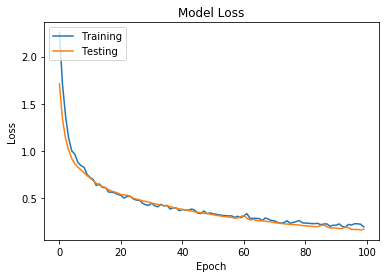

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

In [69]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 278us/sample - loss: 0.1364 - acc: 1.0000


[0.1364254100455178, 1.0]

In [0]:
y_pred = model.predict_classes(x_test[0:3])

In [71]:
print(y_pred)

[1 0 2]


In [72]:
x_test[0:3],y_test[0:3]

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3]]), array([1, 0, 2]))